In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

# 1 - Business Problem
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences(Crime Data).

In [2]:
df = pd.read_csv("D:\\Harsha\\Data sciences\\Assignments\\Assignment_7_Clustering\\crime_data.csv")

# 2 - Data collection and description

In [3]:
df1 = df.copy()

In [4]:
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df1.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [6]:
df1.columns = ['City','Murder' , 'Assault', 'Urbanpop','Rape']

In [7]:
df1.head()

,City,Murder,Assault,Urbanpop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [11]:
df1.dtypes

City         object
Murder      float64
Assault       int64
Urbanpop      int64
Rape        float64
Total       float64
dtype: object

In [12]:
df1.shape

(50, 6)

In [13]:
df1.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,265.320000
std,4.35551,83.337661,14.474763,9.366385,98.350844
min,0.80000,45.000000,32.000000,7.300000,93.400000
25%,4.07500,109.000000,54.500000,15.075000,187.950000
50%,7.25000,159.000000,66.000000,20.100000,257.450000
75%,11.25000,249.000000,77.750000,26.175000,348.500000
max,17.40000,337.000000,91.000000,46.000000,462.300000


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   Urbanpop  50 non-null     int64  
 4   Rape      50 non-null     float64
 5   Total     50 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.5+ KB


In [8]:
df1.loc[:,'Total'] = df1.sum(numeric_only=True, axis=1)

In [9]:
df1.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


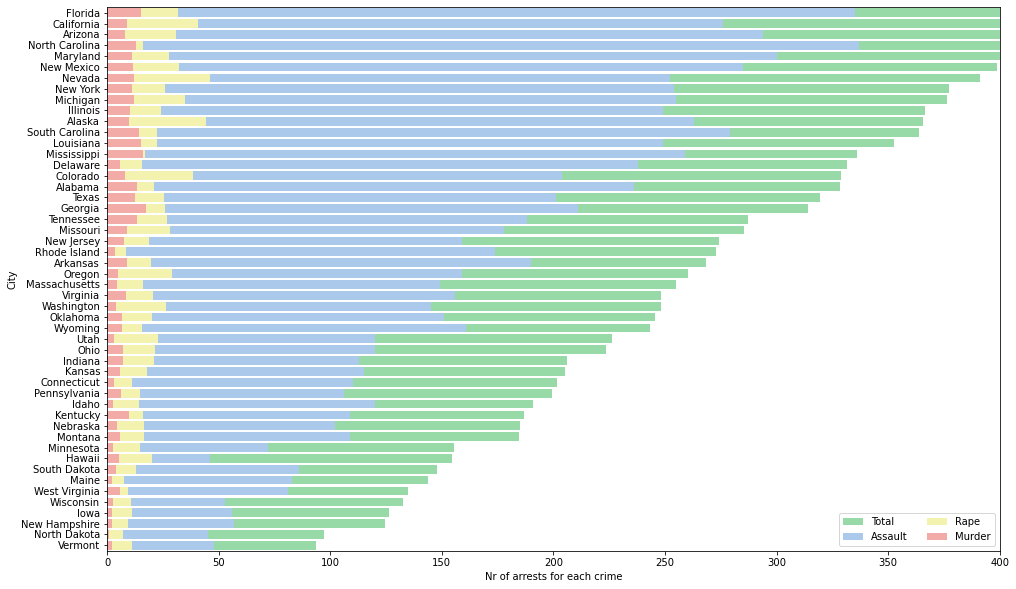

In [15]:
f, ax = plt.subplots(figsize=(16, 10))

stats = df1.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

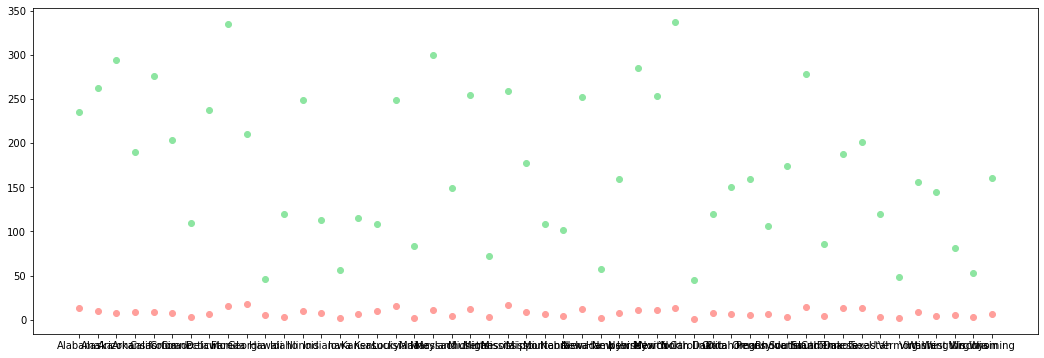

In [23]:
plt.figure(figsize=(18, 6))
plt.scatter(df1.City, df1.Murder, color='r')
plt.scatter(df1.City, df1.Assault, color='g')

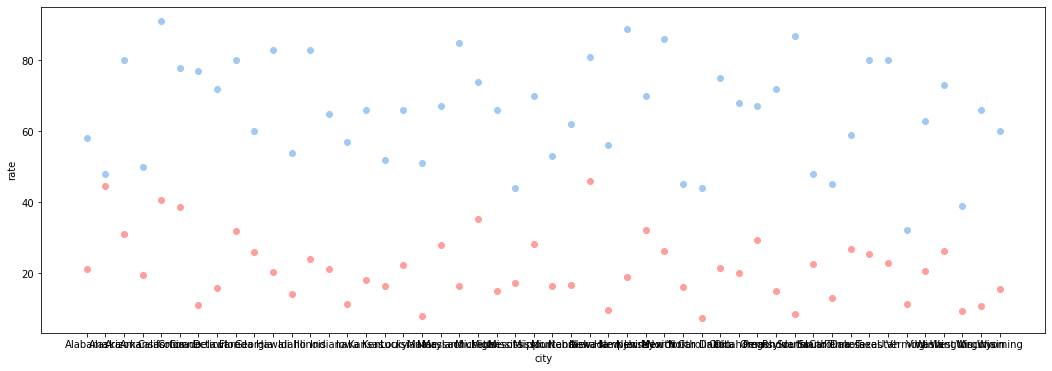

In [27]:
plt.figure(figsize=(18, 6))
plt.scatter(df1.City, df1.Urbanpop, color='b')
plt.scatter(df1.City, df1.Rape, color='r')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

In [28]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [30]:
df_norm = norm_func(df1.iloc[:,1:])
df_norm.describe()

,Murder,Assault,Urbanpop,Rape,Total
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000,0.466034
std,0.262380,0.285403,0.245335,0.242025,0.266606
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904,0.256303
50%,0.388554,0.390411,0.576271,0.330749,0.444700
75%,0.629518,0.698630,0.775424,0.487726,0.691515
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

In [33]:
z = linkage(df_norm, method="complete",metric="euclidean")

# 3 - Finding out the optimal number of clusters

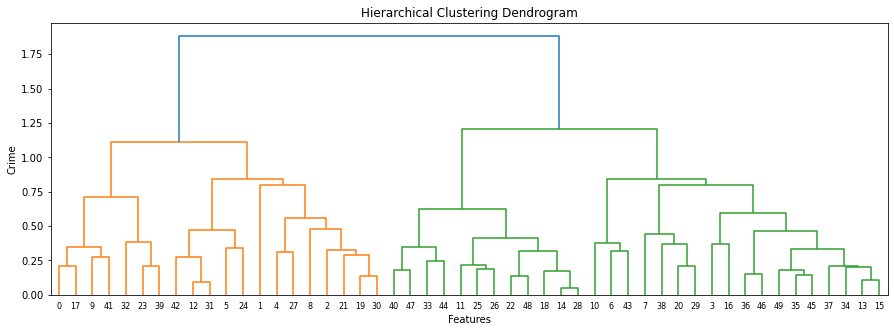

In [34]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  
    leaf_font_size=8.)
plt.show()

### The scree plot levels off at k=4 and let's use it to determine the clusters

In [35]:
df1.corr()

,Murder,Assault,Urbanpop,Rape,Total
Murder,1.000000,0.801873,0.069573,0.563579,0.787665
Assault,0.801873,1.000000,0.258872,0.665241,0.984315
Urbanpop,0.069573,0.258872,1.000000,0.411341,0.408785
Rape,0.563579,0.665241,0.411341,1.000000,0.744424
Total,0.787665,0.984315,0.408785,0.744424,1.000000


In [36]:
k = list(range(2,15))

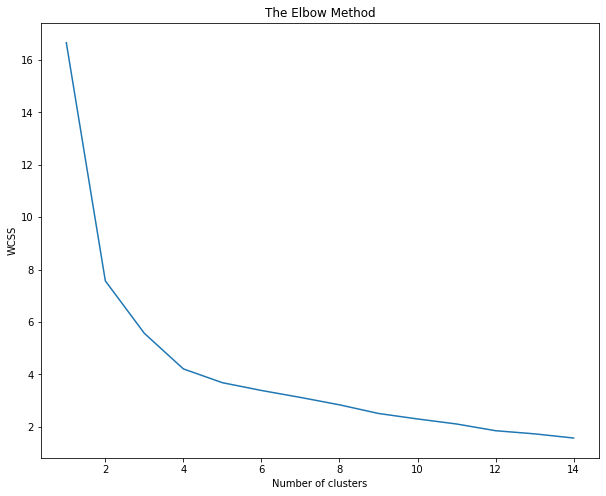

In [41]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# 4 - Analyzing the data

In [45]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_norm)

In [46]:
y_kmeans

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [47]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [60]:
df1['cluster'] = cluster

In [61]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Total,Crime_clusters
cluster,,,,,,
1,11.0,264.0,76.5,33.6,385.1,1.7
2,3.6,78.5,52.1,12.2,146.4,1.6
3,13.9,243.6,53.8,21.4,332.7,1.2
4,5.9,141.2,73.6,19.3,240.0,1.2


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

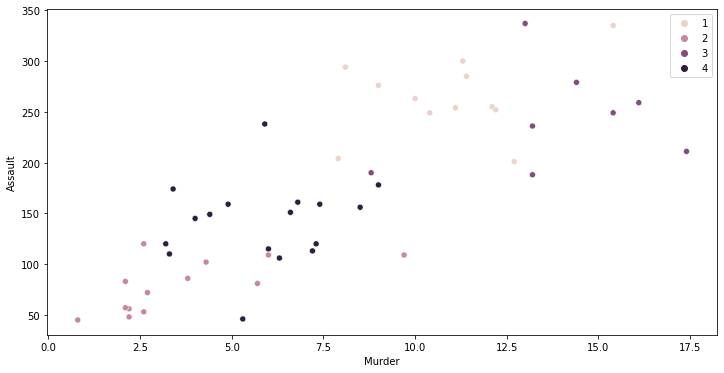

In [50]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Murder'], y = df1['Assault'],hue=y_kmeans1)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

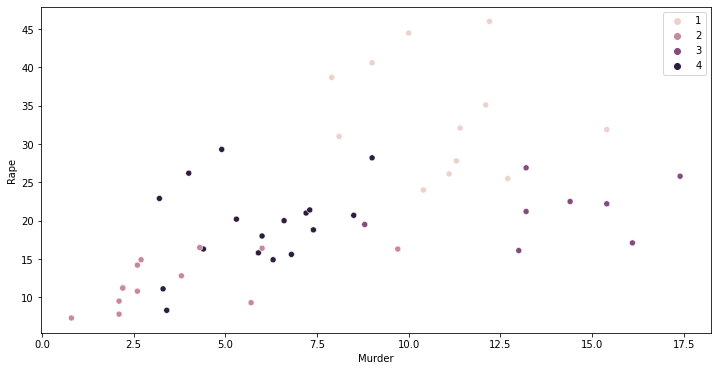

In [51]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Murder'], y = df1['Rape'],hue=y_kmeans1)

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

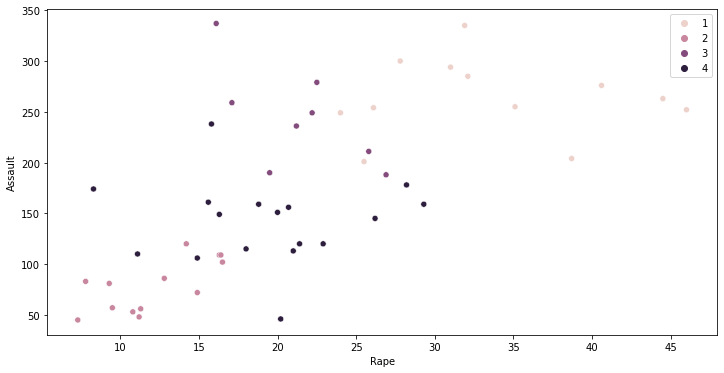

In [52]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Rape'], y = df1['Assault'],hue=y_kmeans1)

In [77]:
stats = df1.sort_values("Total", ascending=True)
df1_total= pd.DataFrame(stats)

In [78]:
df1_total.head()

,City,Murder,Assault,Urbanpop,Rape,Total,cluster,Crime_clusters
44,Vermont,2.2,48,32,11.2,93.4,2,1
33,North Dakota,0.8,45,44,7.3,97.1,2,1
28,New Hampshire,2.1,57,56,9.5,124.6,2,1
14,Iowa,2.2,56,57,11.3,126.5,2,1
48,Wisconsin,2.6,53,66,10.8,132.4,2,1


# 5 - Conclusion

### 1 - Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa

### 2 = Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

### 3 - As with murder and assault, also rates of rape and assault show clearer correlations